In [8]:
# https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

In [ ]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df2 = df.drop('Outcome', axis=1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   label                     768 non-null    int32  
dtypes: float64(6), int32(1), int64(3)
memory usage: 57.1 KB


In [52]:
import plotly.express as px
fig = px.scatter_matrix(df.drop('Outcome', axis=1) , width=1200, height=1600)
fig.show()

In [53]:

fig1 = px.scatter(df, x='Glucose', y='BMI', color="Outcome", size="DiabetesPedigreeFunction")
fig1.update_layout(title="4 Features Representation")
fig1.show()




In [54]:
fig2 = px.scatter_3d(df, x="Glucose", y="BMI",z="BloodPressure",
                     color="Outcome",size="DiabetesPedigreeFunction")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np 

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,2


<AxesSubplot:>

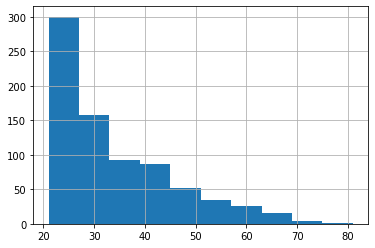

In [57]:
df['Age'].hist()

In [58]:
df["Glucose"].mean()

121.6816015625

In [59]:
df.loc[df["Glucose"] == 0, "Glucose"] = 120.894

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,2


<AxesSubplot:>

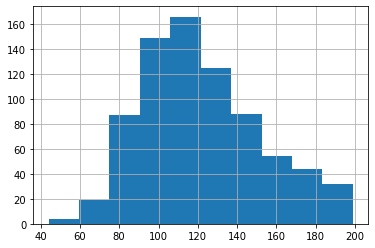

In [61]:
df['Glucose'].hist()

In [62]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681602,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,0.964844
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.757450
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,2.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000


In [63]:
df.loc[df["BloodPressure"] == 0, "BloodPressure"] = 69.105469
df.loc[df["SkinThickness"] == 0, "SkinThickness"] = 20.536458
df.loc[df["Insulin"] == 0, "Insulin"] = 79.799479
df.loc[df["BMI"] == 0, "BMI"] = 31.992578

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,2


In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681602,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958,0.964844
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951,0.757450
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,2.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,2.000000


In [66]:
df1.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [68]:
scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)
inertia = []
for i in range(1, 11): 
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    
fig = go.Figure(data=go.Scatter(x=np.arange(1,11), y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

C:\Users\RANA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [70]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, tol=1e-04, random_state=42)
kmeans.fit(df2)
clusters = pd.DataFrame(df2, columns=df2.columns)
clusters['label']=kmeans.labels_
polar= clusters.groupby('label').mean().reset_index()
polar=pd.melt(polar, id_vars=['label'])
fig4=px.line_polar(polar, r='value', theta='variable', color='label', line_close=True,height=800, width=1400)
fig4.show()